# Avocado Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

In [2]:
# load data set
df=pd.read_csv('Avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
#show the head
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#show the tail
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
# show the informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# find the null value
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
# date preprocessing
df['Date'] = pd.to_datetime(df['Date'])

<AxesSubplot:>

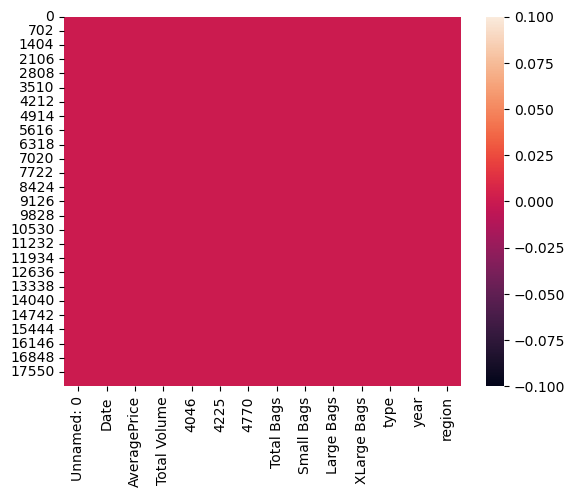

In [9]:
#create heatmap
sns.heatmap(df.isnull())

# CLASSIFICATION

In [10]:
classification_df = df[['AveragePrice', 'Total Volume', 'type', 'year', 'region']]

In [11]:
classification_df = pd.get_dummies(classification_df,columns=['type','year'])

split data in traing and test

In [12]:
x_classification = classification_df.drop('region', axis = 1)

In [13]:
y_classification = classification_df['region']

In [14]:
x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x_classification, y_classification, test_size=0.2,random_state=42)

In [15]:
x_train_classification.shape

(14599, 8)

In [16]:
y_train_classification.shape

(14599,)

In [17]:
x_test_classification.shape

(3650, 8)

In [18]:
y_test_classification.shape

(3650,)

Train randomforest classifier

In [19]:
classification = RandomForestClassifier()

In [20]:
classification.fit(x_train_classification, y_train_classification)

RandomForestClassifier()

predictions the test data

In [21]:
y_classification_pred = classification.predict(x_test_classification)

calculate the accuracy

In [22]:
classification_accuracy = accuracy_score(y_test_classification, y_classification_pred)
print("Classification Accuracy:", classification_accuracy)

Classification Accuracy: 0.3452054794520548


# Regression

In [23]:
regression_df = df[['AveragePrice', 'Total Volume', 'type', 'year']]

In [24]:
regression_df = pd.get_dummies(regression_df, columns=['type', 'year'])

splite data in tarining and testing

In [25]:
X_regression = regression_df.drop('AveragePrice', axis=1)
y_regression = regression_df['AveragePrice']

In [26]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

use linearregression model 

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train_regression, y_train_regression)

LinearRegression()

make prediction data set

In [29]:
y_pred_regression = regressor.predict(X_test_regression)

calculate the error

In [30]:
regression_mae = mean_absolute_error(y_test_regression, y_pred_regression)
print("Regression MAE:", regression_mae)

Regression MAE: 0.23616552299175653


# visulations of regression

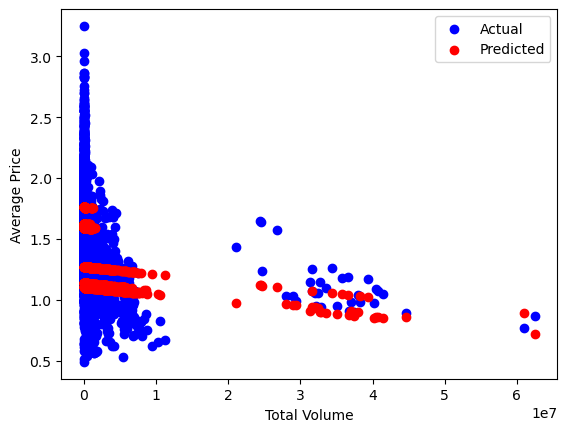

In [31]:
plt.scatter(X_test_regression['Total Volume'], y_test_regression, color='blue', label='Actual')
plt.scatter(X_test_regression['Total Volume'], y_pred_regression, color='red', label='Predicted')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [32]:
import pickle 

In [33]:
filename="Avocado Project 1 (b).pickle"

In [37]:
pickle.dump(regressor, open(filename, 'wb'))

# Avocado project is completed